In [21]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/imdb-dataset-of-50k-movie-reviews/IMDB Dataset.csv


In [22]:
data = pd.read_csv("/kaggle/input/imdb-dataset-of-50k-movie-reviews/IMDB Dataset.csv")

In [23]:
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


## LOWERCASING

In [24]:
data.review = data.review.str.lower()
data.head()

,review,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production. <br /><br />the...,positive
2,i thought this was a wonderful way to spend ti...,positive
3,basically there's a family where a little boy ...,negative
4,"petter mattei's ""love in the time of money"" is...",positive


## Removing HTML tags
. means it matches with any character

\* this is a quatifier, it tells how many dots to match, its tells to match zero or more

? tells to stop matching if the rest of the part matches by itself

for example if pattern = .\*abc and text we have is gighnripipoabcbbb

then its starts matching from start using dot(.) and when it reaches a, the dot matching will stop due to ? as the rest part will be matched directly and the output would be bbb.

compile compiles this pattern and sub substitutes matched pattern with nothing

In [25]:
import re
def remove_html_tags(text):
    pattern = re.compile("<.*?>")
    return pattern.sub(r'',text)

print(remove_html_tags("sfg<lgn>jkfgn"))

sfgjkfgn


In [26]:
data.review = data.review.apply(remove_html_tags)

## removing URLS

s? means s is optional

\S+ takes all non white space characters 

| or operation

\. as we are not using . for special purpose here, we use \. to tell it to consider it normal dot


In [27]:
def remove_url(text):
    pattern = re.compile(r'https?://\S+|www\.\S+')
    return pattern.sub('',text)

remove_url("dilfninvwww.google.com dkjvn")

'dilfninv dkjvn'

In [28]:
data.review = data.review.apply(remove_url)

## removing punctuation

In [29]:
import string,time
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [30]:
punc= string.punctuation

def remove_punctuation(text):
    for char in punc:
        text = text.replace(char,'')
    return text

remove_punctuation("rgoidnf!@#$$#^lnh")

'rgoidnflnh'

#### removing punctuation faster

In [31]:
def remove_punctuation_faster(text):
    return text.translate(str.maketrans('','',punc))

remove_punctuation_faster("ifdbn24repirgj*$*")

'ifdbn24repirgj'

In [32]:
data.review = data.review.apply(remove_punctuation_faster)

## chat word treatment
ASAP -> as soon as possible

In [33]:
short_form_to_whole_text = """AFAIK=As Far As I Know
AFK=Away From Keyboard
ASAP=As Soon As Possible
ATK=At The Keyboard
ATM=At The Moment
A3=Anytime, Anywhere, Anyplace
BAK=Back At Keyboard
BBL=Be Back Later
BBS=Be Back Soon
BFN=Bye For Now
B4N=Bye For Now
BRB=Be Right Back
BRT=Be Right There
BTW=By The Way
B4=Before
B4N=Bye For Now
CU=See You
CUL8R=See You Later
CYA=See You
FAQ=Frequently Asked Questions
FC=Fingers Crossed
FWIW=For What It's Worth
FYI=For Your Information
GAL=Get A Life
GG=Good Game
GN=Good Night
GMTA=Great Minds Think Alike
GR8=Great!
G9=Genius
IC=I See
ICQ=I Seek you (also a chat program)
ILU=ILU: I Love You
IMHO=In My Honest/Humble Opinion
IMO=In My Opinion
IOW=In Other Words
IRL=In Real Life
KISS=Keep It Simple, Stupid
LDR=Long Distance Relationship
LMAO=Laugh My A.. Off
LOL=Laughing Out Loud
LTNS=Long Time No See
L8R=Later
MTE=My Thoughts Exactly
M8=Mate
NRN=No Reply Necessary
OIC=Oh I See
PITA=Pain In The A..
PRT=Party
PRW=Parents Are Watching
QPSA?=Que Pasa?
ROFL=Rolling On The Floor Laughing
ROFLOL=Rolling On The Floor Laughing Out Loud
ROTFLMAO=Rolling On The Floor Laughing My A.. Off
SK8=Skate
STATS=Your sex and age
ASL=Age, Sex, Location
THX=Thank You
TTFN=Ta-Ta For Now!
TTYL=Talk To You Later
U=You
U2=You Too
U4E=Yours For Ever
WB=Welcome Back
WTF=What The F...
WTG=Way To Go!
WUF=Where Are You From?
W8=Wait...
7K=Sick
TFW=That feeling when.
MFW=My face when
MRW=My reaction when
IFYP=I feel your pain
LOL=Laughing out loud
TNTL=Trying not to laugh
JK=Just kidding
IDC=I don’t care
ILY=I love you
IMU=I miss you
ADIH=Another day in hell
IDC=I don’t care
ZZZ=Sleeping, bored, tired
WYWH=Wish you were here
TIME=Tears in my eyes
BAE=Before anyone else
FIMH=Forever in my heart
BSAAW=Big smile and a wink
BWL=Bursting with laughter
LMAO=Laughing my a** off
BFF=Best friends forever
CSL=Can’t stop laughing"""

short_form_to_whole_text = re.split(r'[=\n]', short_form_to_whole_text)

In [34]:
short_form_to_whole_dict={}

for i in range(0,len(short_form_to_whole_text),2):
    short_form_to_whole_dict[short_form_to_whole_text[i]] = short_form_to_whole_text[i+1]

In [35]:
short_form_to_whole_dict

{'AFAIK': 'As Far As I Know',
 'AFK': 'Away From Keyboard',
 'ASAP': 'As Soon As Possible',
 'ATK': 'At The Keyboard',
 'ATM': 'At The Moment',
 'A3': 'Anytime, Anywhere, Anyplace',
 'BAK': 'Back At Keyboard',
 'BBL': 'Be Back Later',
 'BBS': 'Be Back Soon',
 'BFN': 'Bye For Now',
 'B4N': 'Bye For Now',
 'BRB': 'Be Right Back',
 'BRT': 'Be Right There',
 'BTW': 'By The Way',
 'B4': 'Before',
 'CU': 'See You',
 'CUL8R': 'See You Later',
 'CYA': 'See You',
 'FAQ': 'Frequently Asked Questions',
 'FC': 'Fingers Crossed',
 'FWIW': "For What It's Worth",
 'FYI': 'For Your Information',
 'GAL': 'Get A Life',
 'GG': 'Good Game',
 'GN': 'Good Night',
 'GMTA': 'Great Minds Think Alike',
 'GR8': 'Great!',
 'G9': 'Genius',
 'IC': 'I See',
 'ICQ': 'I Seek you (also a chat program)',
 'ILU': 'ILU: I Love You',
 'IMHO': 'In My Honest/Humble Opinion',
 'IMO': 'In My Opinion',
 'IOW': 'In Other Words',
 'IRL': 'In Real Life',
 'KISS': 'Keep It Simple, Stupid',
 'LDR': 'Long Distance Relationship',
 'LM

In [36]:
def chat_words(text):
    new_text = []
    for word in text.split(" "):
        if word.upper() in short_form_to_whole_dict:
            new_text.append(short_form_to_whole_dict[word.upper()])
        else:
            new_text.append(word)
            
    return " ".join(new_text)

In [37]:
chat_words("srlninheg brb")

'srlninheg Be Right Back'

In [38]:
data.review = data.review.apply(chat_words)

## spelling mistakes correction

textblog works on correlating wrong word to a right word

In [39]:
from textblob import TextBlob

def correct_spellings(incorrect_text):
    obj = TextBlob(incorrect_text)
    return obj.correct().string

correct_spellings("one two hasdy")

'one two hardy'

In [40]:
# data.review = data.review.apply(correct_spellings)

# removing stop words

In [41]:
from nltk.corpus import stopwords
stopwords_list = stopwords.words('english')

In [42]:
def remove_stopwords(text):
    new_text = []
    for word in text.split(" "):
        if not (word in stopwords_list):
            new_text.append(word)
            
    return " ".join(new_text)

remove_stopwords("erign and")

'erign'

In [43]:
data.review = data.review.apply(remove_stopwords)
data.review

0        one reviewers mentioned watching 1 oz episode ...
1        wonderful little production filming technique ...
2        thought wonderful way spend Tears eyes hot sum...
3        basically theres family little boy jake thinks...
4        petter matteis love Tears eyes money visually ...
                               ...                        
49995    thought movie right good job wasnt creative or...
49996    bad plot bad dialogue bad acting idiotic direc...
49997    catholic taught parochial elementary schools n...
49998    im going disagree previous comment side maltin...
49999    one expects star trek movies high art fans exp...
Name: review, Length: 50000, dtype: object

## handling emoji

In [44]:
import emoji
emoji.demojize("elrgner😁😉")

'elrgner:beaming_face_with_smiling_eyes::winking_face:'

In [45]:
data.review = data.review.apply(emoji.demojize)

## Tokenization

converting big sentences into smaller parts like words, phrases etc

### 1. directly using split function

In [46]:
sentence = "I am going to delhi"
sentence.split(" ")


['I', 'am', 'going', 'to', 'delhi']

In [47]:
## problems with this kind of split
a = "sentence1. sentence2"
b = "sentence1? sentence2"
print(a.split('.')) # correct
print(b.split('.')) # wrong

['sentence1', ' sentence2']
['sentence1? sentence2']


In [48]:
c =  "i am going to delhi!"
c.split(" ")

['i', 'am', 'going', 'to', 'delhi!']

### 2. using re
better than split but not the best

### 3. NLTK

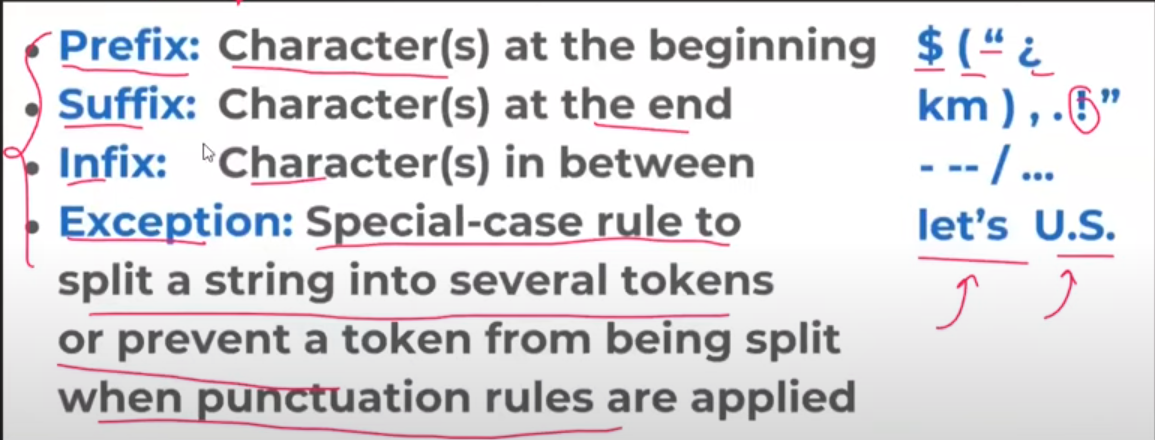

just understand that the algorithm is coded such a way to tokenize correctly including taking care of all the above problems

### 3. using nltk

In [49]:
from nltk import word_tokenize, sent_tokenize

In [50]:
word_tokenize('I am going to delhi!')
# 1. it tokenizes into words, seperates delhi and ! also 

['I', 'am', 'going', 'to', 'delhi', '!']

In [51]:
a = "i am in U.S"
b = "Don't make a fool out of me mr.niggesh"
c = "kurchi marthapetti dobbithe"
d = " my mailid is unclea@gmail.com"
print(word_tokenize(a))
print(word_tokenize(b))
print(word_tokenize(c))
print(word_tokenize(d))

# periods are taken care correctly too
# Dont ->  do n't got some error 
# but majorly this is good

['i', 'am', 'in', 'U.S']
['Do', "n't", 'make', 'a', 'fool', 'out', 'of', 'me', 'mr.niggesh']
['kurchi', 'marthapetti', 'dobbithe']
['my', 'mailid', 'is', 'unclea', '@', 'gmail.com']


### 4. spacy library(best)
1. import
2. create an object and load an english dictionary
3. convert text into document
4. then tokenize

In [52]:
import spacy
spacy_tokenize = spacy.load("en_core_web_sm")

In [53]:
for tokens in spacy_tokenize(d):
    print(tokens)

 
my
mailid
is
unclea@gmail.com


## stemming

reduce inflection in english words

walking, walked, walks -> walk

In [54]:
from nltk.stem.porter import PorterStemmer

In [55]:
stemmer = PorterStemmer()
sentence1 = "walking walked walks walk"

' '.join([stemmer.stem(word) for word in sentence1.split(" ")])

'walk walk walk walk'

In [56]:
sentence2 = " i am going to a movie water today going theatre noble cause favorite want"
' '.join([stemmer.stem(word) for word in sentence2.split(" ")])

' i am go to a movi water today go theatr nobl caus favorit want'

## Lemmatization
lemmatization -> valid word

but lemmatization slower than stemming

lemma = rootword

In [57]:
from nltk.stem import WordNetLemmatizer
wnl = WordNetLemmatizer()

In [58]:
' '.join([wnl.lemmatize(word) for word in sentence2.split(" ")])

' i am going to a movie water today going theatre noble cause favorite want'

In [60]:
' '.join([wnl.lemmatize(word,pos ='v') for word in sentence2.split(" ")]) # (v = verb)

' i be go to a movie water today go theatre noble cause favorite want'

# NOTE: NLTK error fixing
nltk.download('wordnet', download_dir='/kaggle/working/')

command = "unzip /kaggle/working/corpora/wordnet.zip -d /kaggle/working/corpora"

subprocess.run(command.split())

nltk.data.path.append('/kaggle/working/')